# Analysis of Kpop Music Video on YouTube
As Kpop becomes increasingly international, YouTube plays a pivotal roles as the digital platforms for Kpop idols to share their music video to the audience all over the world. The view count is a key metrics reflecting the music videos' international popularity. I extracted the data of all Kpop music videos from Kpop Database and scraped the view counts of all 4262 music videos from YouTube by 04/05/2021. Note that the music videos here are only the official releases, but do not contain performance version, dance practice and any other unofficial releases. After data cleaning, there are 4092 music videos in total with their view count scraped. Here is my analysis of Kpop Music Video on YouTube.

In [28]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

df = pd.read_csv('kpop_music_videos.csv')
df.Date = pd.to_datetime(df.Date)
df["Views"]=None
for i, row in df.iterrows():
    df.at[i,"Artist"] = row.Artist.upper()
    try:
        df.at[i,"Views"] = BeautifulSoup(requests.get(row.Video).text, 'lxml').select_one('meta[itemprop="interactionCount"][content]')['content']
    except:
        df.at[i,"Views"] = 0
df.to_csv("mv_views_040521.csv")
df.Date = pd.to_datetime(df.Date)
df.Views = df.Views.astype(int)
df = df[df.Views!=0]
df.shape[0]

4092

## Timeline of Kpop on YouTube

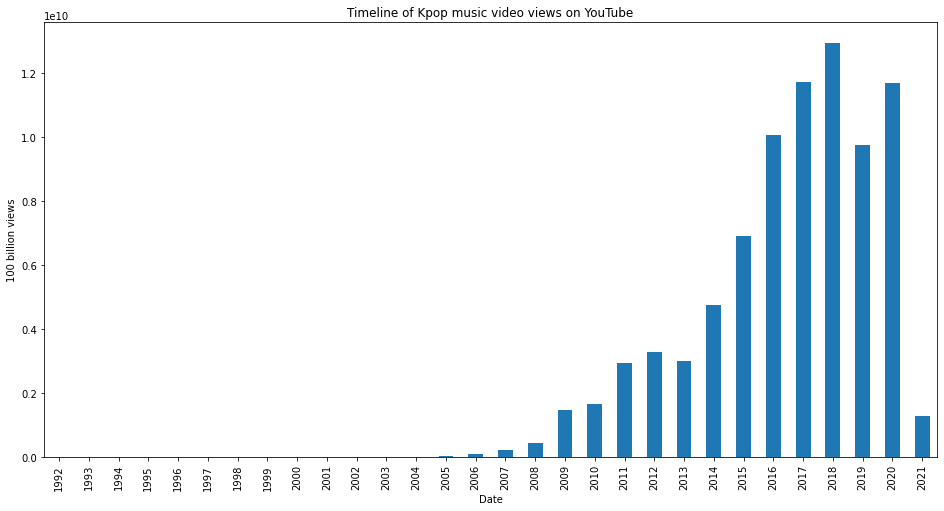

In [198]:
df.groupby(df.Date.dt.year).Views.sum().plot.bar(title = "Timeline of Kpop music video views on YouTube",ylabel="100 billion views")

From the chart above, we can see that from 1992, when Kpop started, to 2005; Kpop music videos have few views on YouTube. This is because YouTube was launched in 2006. The music videos before YouTube's start was only aired on TV then and re-uploaded to YouTube later. As I mentioned in [Pt.1 of Kpop Data Analysis](https://charliezcr.github.io/kda.html), the number of music videos by year started soaring from 2nd Generation Kpop. After 2006, the views of music videos also grows rapidly as the number of music videos increases, and also because the Internet and Kpop becomes more popular. After 2017, the view count gradually became steady.

## Top Charts

In [59]:
df.sort_values(by=['Views'],ascending=False).head(10)

,Date,Artist,Song Name,Video,Type,Release,Views
1397,2018-06-15,BLACKPINK,Ddu Du Ddu Du,https://youtu.be/IHNzOHi8sJs,Girl,Major,1542676991
1016,2019-04-04,BLACKPINK,Kill This Love,https://youtu.be/2S24-y0Ij3Y,Girl,Major,1258052660
1784,2017-09-18,BTS,DNA,https://youtu.be/MBdVXkSdhwU,Boy,Major,1240871015
1003,2019-04-12,BTS,Boy With Luv feat. Halsey,https://youtu.be/XsX3ATc3FbA,Boy,Major,1190165794
2290,2016-08-08,BLACKPINK,BOOMBAYAH,https://youtu.be/bwmSjveL3Lc,Girl,Major,1152800763
1910,2017-06-22,BLACKPINK,As If It's Your Last,https://youtu.be/Amq-qlqbjYA,Girl,Major,988750103
322,2020-08-21,BTS,Dynamite,https://youtu.be/gdZLi9oWNZg,Boy,English,982668564
1438,2018-05-18,BTS,Fake Love,https://youtu.be/7C2z4GqqS5E,Boy,Major,898540568
1690,2017-11-24,BTS,Mic Drop (Steve Aoki Remix),https://youtu.be/kTlv5_Bs8aw,Boy,Major,895391546
1307,2018-08-24,BTS,Idol,https://youtu.be/pBuZEGYXA6E,Boy,Major,885615347


In [61]:
#100 million+ views
df[df.Views>100000000].shape[0]

161

In [62]:
#10 million+ views
df[df.Views>10000000].shape[0]

1116

As we can see from the view counts of individual music videos, there are 5 music videos attracted more than 1 billion views. Besides, there are 161 videos with 100 million+ views, 1116 videos with 10 million+ views. The Kpop music video with the most views is BLACKPINK's *Ddu Du Ddu Du*, with 1.5 billion views. Congratulations BLACKPINK! 

For the TOP 10 music videos with most views, they either from BLACKPINK or BTS. They are all released from 2016 to 2020. For the TOP 20, 19 of them are from BTS and BLACKPINK. BTS and BLACKPINK are YouTube's favorite Kpop stars!

These staggering number shows the great popularity of Kpop on YouTube. However, it still lags behind Western pop music. For example, Justin Bieber's *Sorry* has 3.4 billion views. The most viewed music video on YouTube is *Despacito*, with 7.2 billion views.

In [67]:
df.groupby(df.Artist)['Views'].sum().sort_values(ascending=False).head(10)

Artist
BTS                  12913443302
BLACKPINK             8237816130
TWICE                 5972095898
EXO                   3233536172
BIGBANG               3217412163
GIRLS' GENERATION     2320520992
RED VELVET            2052927896
GOT7                  2034093867
SUPER JUNIOR          1401823237
IKON                  1183243079
Name: Views, dtype: int64

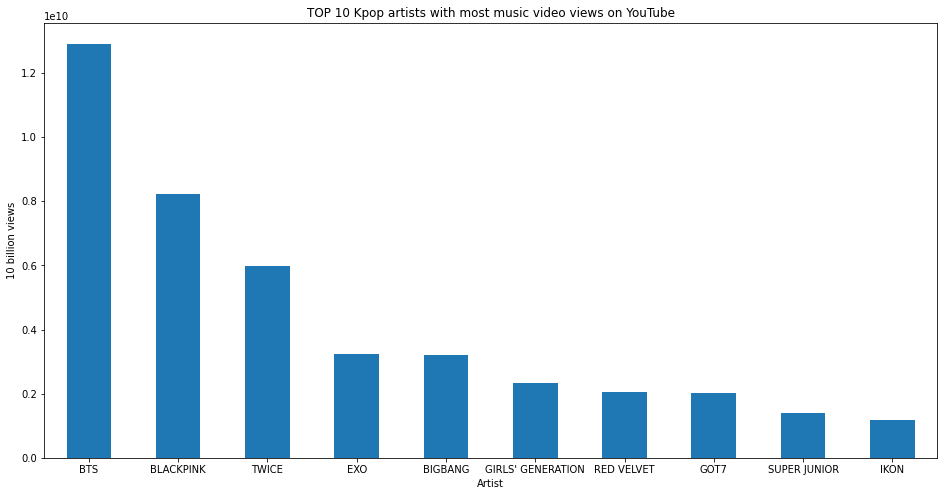

In [200]:
df.groupby(df.Artist)['Views'].sum().sort_values(ascending=False).head(10).plot.bar(rot=0,title="TOP 10 Kpop artists with most music video views on YouTube",ylabel="10 billion views")

Here are the TOP 10 Kpop artists with most music video views on YouTube. They are BTS, BLACKPINK, TWICE, EXO, BIGBANG, Girls' Generation, Red Velvet, GOT7, Super Junior, and IKON. BTS has more than 10 billion views in total. All of them have more than 1 billion views in total.

BTS and BlACKPINK's success on YouTube reflects their massive amount of international fans and audience. These 2 groups always value worldwide audience. Their music is not like traditional Kpop, but like Western pop, hip-hop and edm music. Compared with other success Kpop groups, BTS and BLACKPINK are popular not just in East Asia, but also in Western world. For No.3 and No.4, TWICE and EXO are also famous internationally. However, their target international markets are not so worldwide as BTS and BLACKPINK. TWICE's target is mainly Japan, while EXO targeting at China (where YouTube is not available). Their music are more localized for their target market, resulting in fewer audience on YouTube. For No.5 and No.6, BIGBANG and Girls' Generation, they were also popular internationally but they were 2nd Gen Kpop groups active before 2015. The popularity of Kpop and Internet were not so strong then.

## Music Videos in Japanese

In [197]:
japanese = df[df.Release=="Japanese"].groupby([df.Date.dt.year,"Artist","Song Name"]).sum()
japanese

Views
Date Artist   Song Name                              
2006 SHINHWA  In our heart there is the sun    104568
2008 BIGBANG  How Gee                         4496139
              Number 1                        6454891
              With You                       10354166
     FTISLAND Friendship                       194957
...                                               ...
2021 TREASURE Beautiful                       4197685
              I LOVE YOU (Japanese Ver.)      1774690
              MMM (Japanese Ver.)             1408879
              MY TREASURE (Japanese Ver.)     1083653
     TXT      Blue Hour Japanese Ver.         5258324

[354 rows x 1 columns]

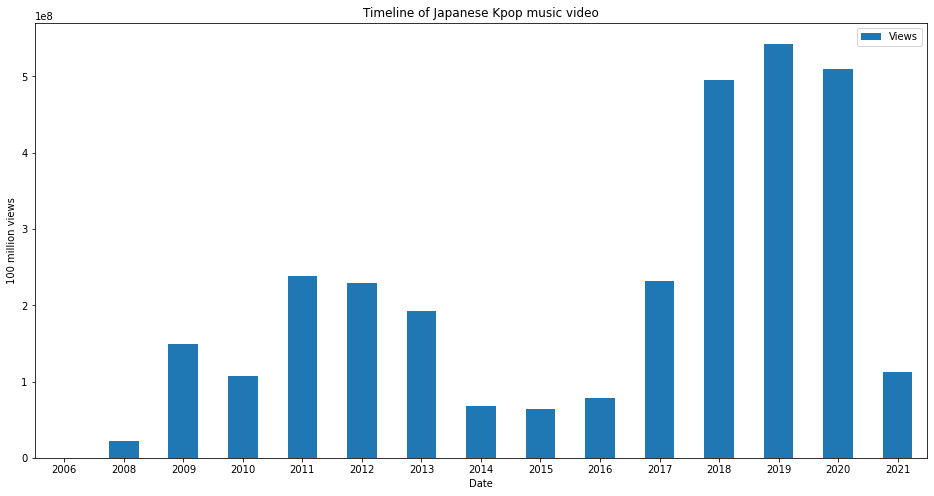

In [201]:
df[df.Release=="Japanese"].groupby(df.Date.dt.year).sum().plot.bar(title = "Timeline of Japanese Kpop music video",ylabel="100 million views",rot=0)

In [185]:
top10jp = japanese.groupby(["Artist"]).sum().sort_values(by="Views", ascending=False).head(10)
top10jp

,Views
Artist,
TWICE,724877954
GIRLS' GENERATION,479146733
BTS,337028561
BIGBANG,242617411
GOT7,107250026
NIZIU,90819520
SEVENTEEN,72712511
IZ*ONE,68416177
SHINEE,66170835


Kpop has a long history of making Japanese songs and music videos. Sometimes Kpop idols translate their Korean songs into Japanese and sometimes they just make brand new Japanese songs. There are 354 Japanese Kpop music videos on YouTube. 91 groups have released Japanese music videos on YouTube. Among them, the Top 10 most viewed groups are TWICE, Girls' Generation, BTS, BIGBANG, GOT7, NiziU, Seventeen, IZ\*ONE, SHINEE and Red Velvet. Note that there are also a lot of Kpop idols release their songs in Japanese but do not make music videos for them, but they are also successful in Japan.

Kpop started making music videos in Japanese since 2006, and attracted great amount of views from 2009 to 2013, thanks to the successful 2nd Gen Kpop groups like Girls' Generation and BIGBANG. 

However, the views started declining significantly since 2013 and reached a saddle point from 2014 to 2016. This is probably caused by the political conflicts between Korea and Japan, also because 2nd Gen Kpop groups who used to be popular in Japan became inactive. Kpop also suffered from its loss of Japanese market.

But in 2017, Kpop rised again in Japan as 3rd Gen Kpop groups reintroduces Kpop to Japan. The views of their music videos soared and achieved greater success than the peak of 2nd Gen Kpop groups. These 3rd Gen Kpop groups adopted even more localization strategies than before, such as TWICE, IZ\*ONE and NiziU.

For example, JYP entertainment's girl group TWICE has 3 Japanese member in this 9-member group. Compared with 2nd Gen Kpop groups, TWICE achieved even greater success in Japan because they have so many Japanese members in the crew.

In 2018, CJ E&M's reality show *Produce 48* produced the group IZ\*ONE. The group has 3 Japanese members in this 12-member group. Unlike TWICE's Japanese members, who are trained by JYP Enternment as Kpop idols in Korea. IZ\*ONE's Japanese members are active Jpop idols from AKB48, a famous series of Jpop idol groups. IZ\*ONE's Japanese activities are also managed by the producer of AKB48. They are even more localized as they combined Jpop and Kpop together. Because of the great success of *Produce 48*, CJ E&M even sold this show to Japan and let Japanese produce their own groups in their *Produce 101* shows.

In 2020, JYP entertainment debuted its first localized Japanese Kpop group NiziU through their reality show, according to their "Globalization + Localization" strategy. NiziU's genre is Kpop, and they are managed in a Kpop way; but their members are all Japanese and their songs are all in Japanese. Therefore, I predict that there will be more localized Japanese Kpop groups and greater localization in future for Kpop's development in Japan.

## Music Videos in English

In [203]:
english = df[df.Release=="English"].groupby([df.Date.dt.year,"Artist","Song Name"]).sum()
english

Views
Date Artist                Song Name                                    
2009 WONDER GIRLS          Nobody                              100808977
2010 WONDER GIRLS          2 Different Tears                     3502611
2012 WONDER GIRLS          Like Money ft. Akon                  14364266
                           The DJ Is Mine                        7698326
2014 SPICA                 I Did It                              1852354
2015 GIRLS' GENERATION-TTS Dear Santa (English ver.)             7080590
2017 KARD                  Don't Recall (Hidden ver.)            7144374
2018 HENRY                 Monster                               5164403
     MINZY                 All Of You Say                         859464
     NCT 127               Regular (English ver.)               66966579
2019 MONSTA X              Someone's Someone                    23183802
                           Who Do U Love feat. French Montana   37174451
     NCT 127               Highway To Heaven                    35193166
     SAN (HOTSHOT)         Free Falling (Eng Ver.)                 10184
     TIFFANY YOUNG         Run For Your Life                     3134688
     TXT                   Cat & Dog (English ver.)             11634989
2020 BTS                   Dynamite                            982668564
     MONSTA X              YOU CAN'T HOLD MY HEART              10374864

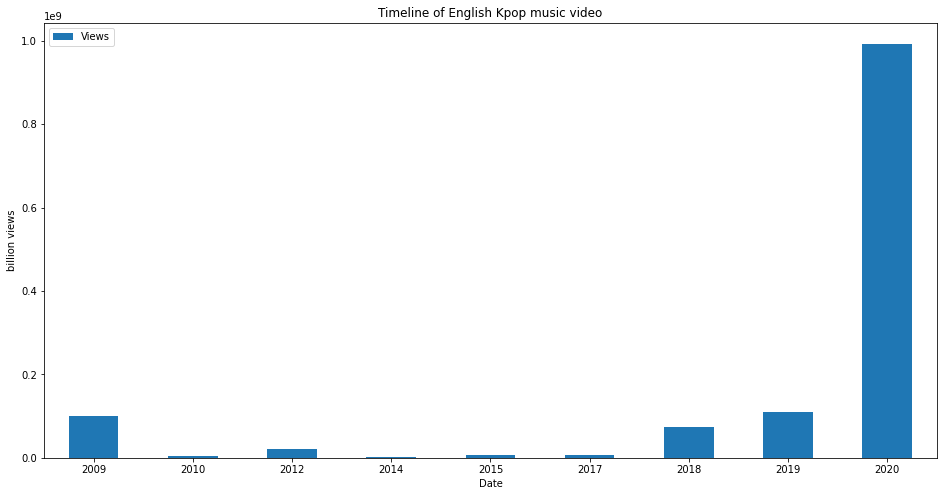

In [204]:
df[df.Release=="English"].groupby(df.Date.dt.year).sum().plot.bar(title = "Timeline of English Kpop music video",ylabel="billion views",rot=0)

A new trend in Kpop industry is "Go West, Young Men!" Kpop has a relatively young history of making English music videos. There are only 18 Kpop music videos in English. 12 Kpop artists have made English Kpop music videos.
The trend of English music videos is also interesting. It started in 2009 when Wonder Girls tried making English music videos and gained some views. The views declined from 2010 because Wonder Girls were unsuccessful in Western countries. It was difficult for Kpop to develop in Western world because of the tremendous cultural difference then. However, with the advent of BTS, Kpop suddenly became so success in Western world. Kpop starts getting attention on YouTube for their music videos from 2018, and skyrocketed in 2020, mostly because of BTS' hit song *Dynamite*. BTS already became a phenomenon across the globe.

In [193]:
top5en = english.groupby(["Artist"]).sum().sort_values(by="Views", ascending=False).head(5)
top5en

,Views
Artist,
BTS,982668564
WONDER GIRLS,126374180
NCT 127,102159745
MONSTA X,70733117
TXT,11634989


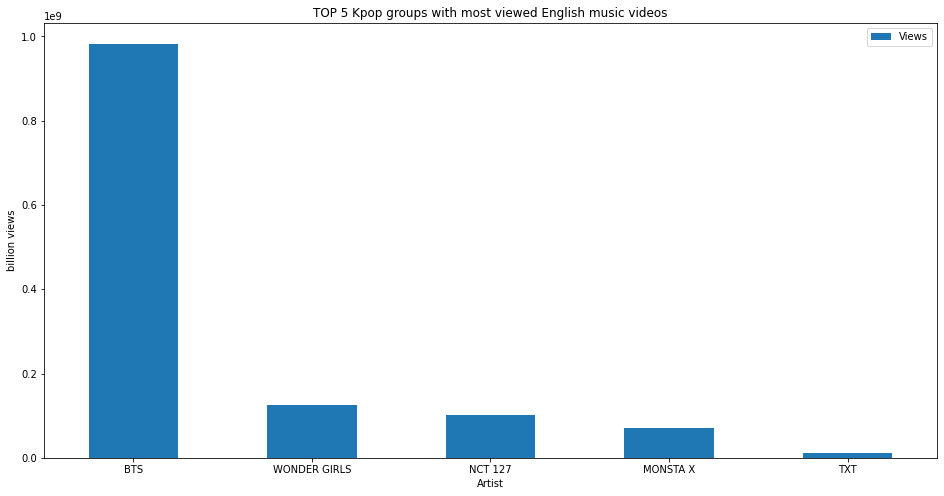

In [205]:
top5en.plot.bar(title="TOP 5 Kpop groups with most viewed English music videos",rot=0,ylabel="billion views")

TOP 5 Kpop groups with most viewed English music videos are BTS, Wonder Girls, NCT 127, Monsta X and TXT. Among them, BTS is way beyond the rest 4 of them. However, there is a great challenge for Kpop's success in Western world in future. BTS' members will have to serve Korean military from 2022. Therefore, their group activity will be in hiatus since then. Will other Kpop artists take up BTS' mantle in Western world and keep Kpop popular across the world? Or will BTS' members solo activities be popular when other members are in the military service? We need to wait and see how Kpop develops in the future 4th generation.